In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('Family Income and Expenditure.csv', sep = ',')

In [3]:
#df.info()

In [4]:
#type object: considerado soma de 2 ou mais tipos de variável
for item in list(df.columns.values):
    if df[item].dtype == 'O':
        df[item] = df[item].astype(str) #transformar type(object) para type(str) para nao gerar TypeError

## Milestone 1

#### Amostragem 

In [5]:
#AMOSTRA ALEATÓRIA SIMPLES (AAS)

index_sample = []
for i in range(100):
    index_sample.append(random.randint(0,(len(df)+1)))
    
df_aas = df.loc[index_sample,:]

In [6]:
#AMOSTRA SISTEMÁTICA

df = df.sort_values(by = ['Total Household Income'],ascending = True).reset_index().drop(columns = ['index'])

k = len(df)//100

index_sample = []

i = 0 #adicionar valor minimo
for j in range(100):
    index_sample.append(i)
    i+=k
    
df_sist = df.loc[index_sample,:]

#### Estatísticas Descritivas e Análise Visual

In [7]:
quant_items = []
quali_items = []

for item in list(df.columns.values):
    if df[item].dtype == 'O':
        quali_items.append(item)
    else:
        quant_items.append(item)

In [8]:
df_aas_quant = df_aas.drop(columns = quali_items).loc[:,quant_items[0:10]]
df_sist_quant = df_sist.drop(columns = quali_items).loc[:,quant_items[0:10]]
df_all_quant = df.drop(columns = quali_items).loc[:,quant_items[0:10]]

describe_aas = df_aas_quant.describe().drop('count',axis = 0)
describe_sist = df_sist_quant.describe().drop('count',axis = 0)
describe_all = df_all_quant.describe().drop('count',axis = 0)

In [9]:
describe_aas

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure
mean,2.479671e+05,81591.740000,0.40000,23337.500000,16423.520000,9584.610000,10612.520000,2545.220000,5013.960,14534.910000
std,2.741413e+05,41925.879002,0.68165,9944.116444,9029.107216,8756.453465,6932.686167,2537.573125,2890.698,18435.091248
min,5.455400e+04,28526.000000,0.00000,1998.000000,0.000000,0.000000,0.000000,155.000000,0.000,0.000000
25%,1.007292e+05,54674.000000,0.00000,16000.000000,11127.250000,4089.250000,5708.750000,1098.750000,3064.250,1650.000000
50%,1.387635e+05,68674.500000,0.00000,21966.500000,14455.000000,6781.000000,9076.500000,1925.500000,4392.000,8342.500000
75%,2.855348e+05,95188.750000,1.00000,29380.750000,20693.500000,12772.000000,14090.500000,2707.000000,6542.000,18940.000000
max,1.480400e+06,216683.000000,2.00000,59996.000000,54858.000000,48854.000000,43030.000000,18616.000000,13187.000,85998.000000


In [10]:
describe_all

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000


In [11]:
describe_sist

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure
mean,2.328442e+05,87521.320000,0.500000,26285.630000,20189.610000,10917.160000,10495.110000,2199.000000,4672.450000,16818.600000
std,2.071488e+05,56250.086338,0.731679,14999.012508,13669.468146,10744.412905,8696.161257,1751.946191,2837.520398,23758.733403
min,1.128500e+04,14709.000000,0.000000,3158.000000,91.000000,190.000000,1340.000000,0.000000,350.000000,0.000000
25%,1.043692e+05,52215.500000,0.000000,17031.500000,10825.250000,3549.750000,5425.250000,953.750000,2684.500000,3498.750000
50%,1.624915e+05,80342.000000,0.000000,23218.000000,17360.000000,7918.500000,8118.500000,1625.500000,4250.000000,8555.000000
75%,2.847320e+05,111110.500000,1.000000,33353.750000,27719.250000,14350.500000,12641.000000,2721.250000,5921.250000,19277.500000
max,1.236260e+06,397574.000000,2.000000,117974.000000,104745.000000,54646.000000,61005.000000,8099.000000,17413.000000,139600.000000


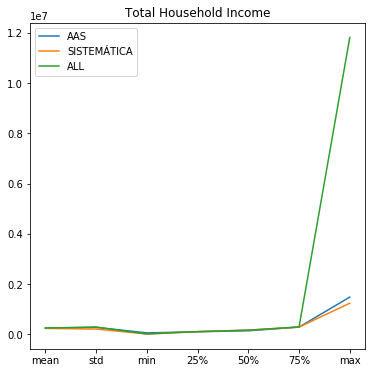

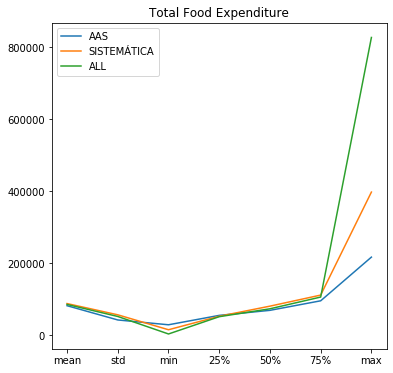

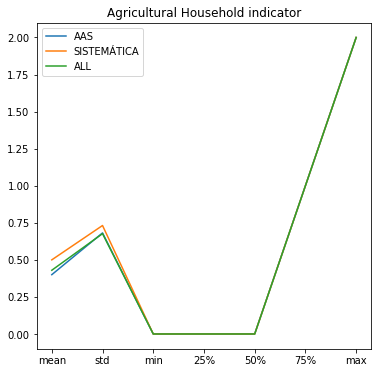

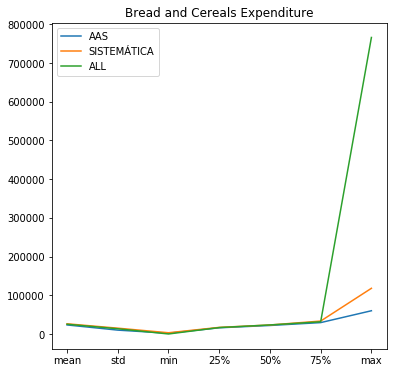

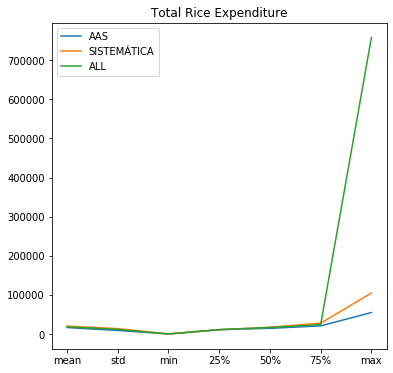

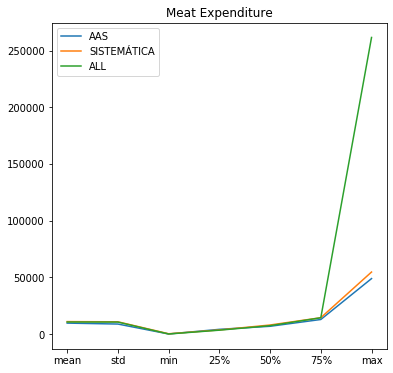

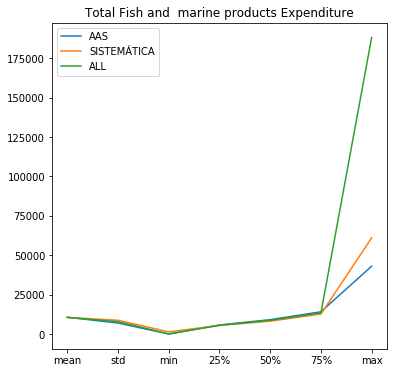

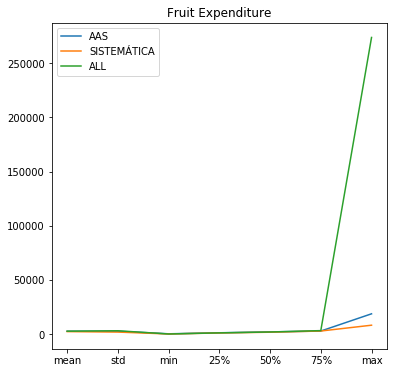

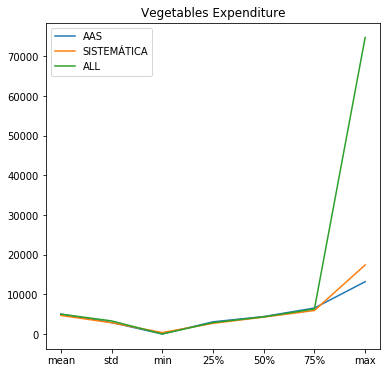

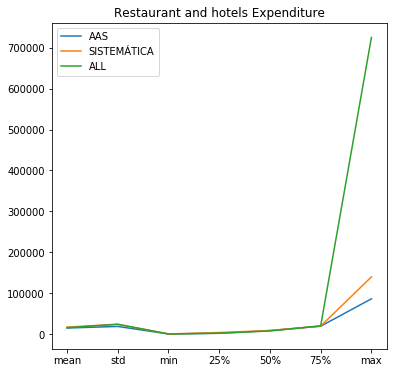

In [12]:
variavel = list(df_aas_quant.columns.values)

x = [i+1 for i in range(len(describe_aas))]

for i in variavel:
    
    plt.figure(figsize=(6,6))

    y1 = list(describe_aas[i].values)
    y2 = list(describe_sist[i].values)
    y3 = list(describe_all[i].values)
    
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.plot(x,y3)
    
    plt.legend(['AAS','SISTEMÁTICA','ALL'])
    plt.title(i)
    plt.xticks(x, list(describe_aas.index.values))
        
    plt.show()

In [13]:
#COEFICIENTE DE ASSIMETRIA AMOSTRAL
#https://www.insper.edu.br/docentes/rinaldo-artes/wp-content/uploads/sites/14/2014/09/Medidas-de-forma-Assimetria_2014.pdf

def coef_simetria(dataframe):

    lista_coef = []
    
    for i in list(dataframe.columns.values):
        
        vetor = dataframe[i].values
        media = np.ones(len(dataframe[i]))*np.mean(dataframe[i].values)
        dp = np.std(dataframe[i].values)
        
        coef = (1/len(dataframe[i]))*np.sum(((vetor - media)/dp)**3)
        
        lista_coef.append(round(coef,2))
        
    return lista_coef

In [14]:
coef_aas = coef_simetria(df_aas_quant)
coef_sist = coef_simetria(df_sist_quant)
coef_all = coef_simetria(df_all_quant)

In [15]:
for i in range(len(coef_aas)):
    print(list(df_aas_quant.columns.values)[i],':', coef_aas[i],'\t',coef_sist[i],'\t',coef_all[i])

Total Household Income : 2.94 	 2.29 	 8.9
Total Food Expenditure : 1.54 	 2.37 	 2.23
Agricultural Household indicator : 1.42 	 1.09 	 1.29
Bread and Cereals Expenditure : 0.79 	 2.63 	 7.01
Total Rice Expenditure : 1.23 	 2.54 	 8.99
Meat Expenditure : 1.96 	 1.89 	 2.6
Total Fish and  marine products Expenditure : 1.47 	 2.75 	 2.87
Fruit Expenditure : 3.32 	 1.52 	 21.7
Vegetables Expenditure : 0.86 	 1.55 	 2.51
Restaurant and hotels Expenditure : 1.87 	 2.73 	 5.74


#### Considerações finais

Conforme observado nas estatísticas descritivas e nos gráficos, a amostragem aleatória simples e a amostragem sistemática trouxeram uma boa representação do todo. 

No caso do ponto máximo da amostra com todos os valores, podemos considerar o ponto máximo um outlier em praticamente em todos os gráficos, fugindo da distribuição em torno da média, principalmente considerando que o levantamento feito neste estudo é de distribuição de gastos e renda.

Considerando o aspecto simétrico de distribuição das amostras, todos os coeficientes de assimetria são positivos, o que significa que todas as distribuições são assimétricas positivas.

Para eliminar a aleatoriedade das inúmeras vezes que o programa rodar, o estudo será prosseguido com a distribuição sistemática.

## Milestone 2

Calcule com 95% de confiança a média de dinheiro gasto com saúde e educação (colunas Medical Care Expenditure e Education Expenditure)

In [16]:
array_MCE = df_sist['Medical Care Expenditure'].values
array_EE = df_sist['Education Expenditure'].values

In [17]:
import numpy as np                                                         
import scipy as sp                                                         
import scipy.stats
import statistics as st

def intervalo_conf(array):
    
    media = np.mean(array)
    desv_pad = np.std(array)
    
    conf_int = scipy.stats.norm.interval(0.95, loc=media, scale=desv_pad/np.sqrt(len(array)))
    
    return conf_int

In [18]:
#Dinheiro gasto com saúde
intervalo_conf(array_MCE)

(3288.771697332417, 8707.608302667582)

In [19]:
#Dinheiro gasto com educação
intervalo_conf(array_EE)

(3457.906195286556, 9727.773804713444)

Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.

In [20]:
df_sist_male = df_sist[df_sist['Household Head Sex']=='Male']
df_sist_female = df_sist[df_sist['Household Head Sex']=='Female']

array_male = df_sist_male['Total Number of Family members'].values
array_female = df_sist_female['Total Number of Family members'].values

In [36]:
from scipy.stats import ttest_ind
from scipy.stats import f

def compare_2_means(array1,array2,alpha):
    
    #TESTE F PARA SABER SE AS VARIÂNCIAS SÃO IGUAIS
    
    equal_vars = 1 #hipotese H0 de que as variancias são iguais
    F = (np.std(array1)**2)/(np.std(array2)**2)
    len_1 = len(array1)-1
    len_2 = len(array2)-1
    
    p_f = f.cdf(F,len_1,len_2) #p-value para o teste f
                                 
    if p_f > alpha:
        equal_vars = 0 #rejeita a hipotese de que as variancias são iguais
        
    #TESTE T PARA SABER SE AS MÉDIAS SÃO IGUAIS
    
    if equal_vars == 0: #rejeita a hipotese de que as variancias são iguais
        stat,p = ttest_ind(array1, array2,equal_var = False)
    else:
        stat,p = ttest_ind(array1, array2,equal_var = True)
        
    print('Statistics:', round(stat,2),',', 'P-value: ',round(p,2))

In [37]:
compare_2_means(array_male, array_female,0.05)

#Como alpha < p-value, as médias podem ser consideradas iguais

Statistics: -0.42 , P-value:  0.68


Calcule se há diferença de média total de renda da família(total household Income) de acordo com a fonte salarial (main source of income)

In [23]:
# 'Total Household Income'
df_sist['Main Source of Income'].unique()

array(['Other sources of Income', 'Enterpreneurial Activities',
       'Wage/Salaries'], dtype=object)

In [24]:
df_sist['Main Source of Income'] = df_sist['Main Source of Income'].replace(['Other sources of Income', 
                                                                        'Enterpreneurial Activities'],'Others')
df_sist['Main Source of Income'].unique()

array(['Others', 'Wage/Salaries'], dtype=object)

In [25]:
df_sist_others = df_sist[df_sist['Main Source of Income']=='Others']
df_sist_ws = df_sist[df_sist['Main Source of Income']=='Wage/Salaries']

array_others = df_sist_others['Total Household Income'].values
array_ws = df_sist_ws['Total Household Income'].values

In [26]:
compare_2_means(array_others, array_ws,0.05)

#num intervalo de até 8% de alpha, as médias são iguais

Statistics: -1.79 , P-value:  0.08


## Milestone 3

In [27]:
df['Household Head Job or Business Indicator'].unique() #2 classificações apenas (ufa!)

array(['With Job/Business', 'No Job/Business'], dtype=object)

In [28]:
df['Household Head Highest Grade Completed'].unique() #imprimir valores únicos e classificá-los manualmente

fundamental = ['Grade 4','Elementary Graduate','No Grade Completed','Grade 2', 'Grade 1', 'Grade 3', 'Grade 5',
               'Grade 6', 'Preschool']
medio = ['High School Graduate','Second Year High School', 'Third Year High School','First Year High School']
superior = ['Second Year College','Computing/Information Technology Programs',
            'Engineering and Engineering trades Programs','Business and Administration Programs',
            'Engineering and Engineering Trades Programs','First Year Post Secondary',
            'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree',
            'Agriculture, Forestry, and Fishery Programs','Transport Services Programs', 'Humanities Programs',
            'Health Programs', 'Second Year Post Secondary','Health Programs', 'Second Year Post Secondary',
            'Security Services Programs', 'Environmental Protection Programs','Physical Sciences Programs', 
            'Basic Programs','Social Services Programs', 'Post Baccalaureate', 'Manufacturing and Processing Programs',
            'Life Sciences Programs','Arts Programs', 'Journalism and Information Programs','Veterinary Programs',
            'Mathematics and Statistics Programs', 'Law Programs','Architecture and Building Programs',
            'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)',
            'Social and Behavioral Science Programs','Personal Services Programs', 'Third Year College',
            'First Year College', 'Fourth Year College','Teacher Training and Education Sciences Programs']

ensino = [fundamental, medio, superior]
class_ensino = ['fundamental','medio','superior']

for i in range(len(ensino)):    
    df_sist = df_sist.apply(lambda x: x.replace(ensino[i], class_ensino[i]), axis=0)


#### Construção de Gráfico para Gestão Visual 

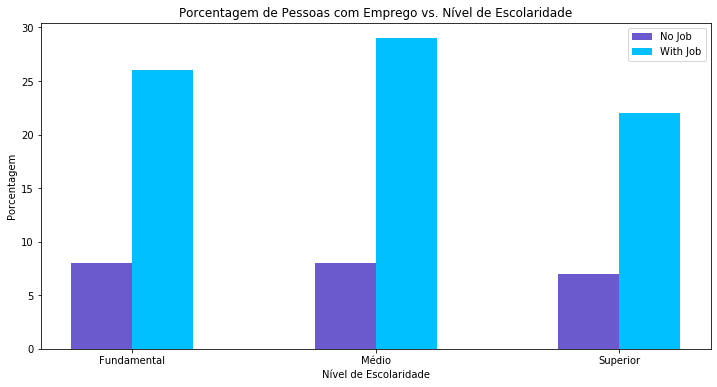

In [29]:
#https://medium.com/horadecodar/gr%C3%A1ficos-de-barra-com-matplotlib-85628bfc4351

df_nojob = df_sist[df_sist['Household Head Job or Business Indicator']=='No Job/Business']
df_withjob = df_sist[df_sist['Household Head Job or Business Indicator']=='With Job/Business']

#porcentagens em cada nível (fundamental, medio e superior)
x = class_ensino
nojob = list(df_nojob['Household Head Highest Grade Completed'].value_counts().sort_index().values)
withjob = list(df_withjob['Household Head Highest Grade Completed'].value_counts().sort_index().values)

#gráfico
barWidth = 0.25

plt.figure(figsize = (12,6))

r1 = [0,1,2]
r2 = [i + barWidth for i in r1]

plt.bar(r1, nojob, color = '#6A5ACD', width = barWidth, label = 'No Job')
plt.bar(r2, withjob, color = '#00BFFF', width = barWidth, label = 'With Job')

plt.xlabel('Nível de Escolaridade')
plt.xticks([(r+(barWidth)/2) for r in r1],['Fundamental','Médio','Superior'])
plt.ylabel('Porcentagem')
plt.title('Porcentagem de Pessoas com Emprego vs. Nível de Escolaridade')

plt.legend()
plt.show()

#### Cálculo de Independência 

Para realizar o cálculo de independência, usaremos o teste do qui-quadrado.

HIPÓTESES:

H0: o nível de escolaridade não influencia no fato de ter ou não emprego

H1: existe diferença

Sendo assim, vamos considerar como cenário ideal as médias entre as populações.

In [30]:
#tabela suposta
table = pd.DataFrame(data = {'No Job': nojob, 'With Job': withjob})
table['Soma_h'] = (table['No Job'].values + table['With Job'].values)

table = table.T.rename(columns = {0:'Fundamental',1:'Médio',2:'Superior'})
table_3 = table.drop(index = 'Soma_h')

table['Soma_v'] = table['Fundamental']+table['Médio']+table['Superior']

table

,Fundamental,Médio,Superior,Soma_v
No Job,8,8,7,23
With Job,26,29,22,77
Soma_h,34,37,29,100


In [31]:
table_3 #tabela observada

,Fundamental,Médio,Superior
No Job,8,8,7
With Job,26,29,22


In [33]:
from scipy.stats import chisquare,chi2_contingency

chi2_3, pval_3, dof_3, exp_3 = chi2_contingency(table_3)

In [34]:
exp_3 #tabela esperada

array([[ 7.82,  8.51,  6.67],
       [26.18, 28.49, 22.33]])

In [35]:
chi2_3, pval_3 #statistica e p-valor

(0.06627805375490355, 0.9674040550743661)

#### Considerações Finais

 Conforme observado visualmente no gráfico de número de empregados e desempregados por nível de escolaridade, e confirmado pelo teste Qui-quadrado (statistic < p-value), o grau de escolaridade NÃO influencia na empregabilidade, sendo assim, devemos aceitar a hipótese H0.